In [1]:
import numpy as np
import math
from Deterministic_MDP import Motion

In [2]:
initial_value=np.zeros([8,10])

In [3]:
def step_optimization(start_row,start_column,value_map,discount,dp):
    
    udp=(1-dp)/3
    
    Step_motion=Motion(start_row,start_column,value_map,discount)
    upvalue,upnew=Step_motion.up_value()
    
    Step_motion=Motion(start_row,start_column,value_map,discount)
    downvalue,downnew=Step_motion.down_value()
    
    Step_motion=Motion(start_row,start_column,value_map,discount)
    leftvalue,leftnew=Step_motion.left_value()
    
    Step_motion=Motion(start_row,start_column,value_map,discount)
    rightvalue,rightnew=Step_motion.right_value()
    
    policy_value={'up':upvalue,'down':downvalue,'left':leftvalue,'right':rightvalue}
    policy_new_input={'up':upnew,'down':downnew,'left':leftnew,'right':rightnew}
    action_value={}
    
    
    for a in policy_value.keys():
        d_value=0
        for b in policy_value.keys():
            if b==a:
                d_value=d_value+dp*policy_value[b]
            else:
                d_value=d_value+udp*policy_value[b]
        action_value.update({a:d_value})
    
    opt_action=max(action_value)
    return action_value,policy_new_input

In [4]:
def value_map(start_row,start_column,initial_value,discount,dp,iteration):
    k=0
    while k<iteration:
        step_value,step_policy=step_optimization(start_row,start_column,initial_value,discount,dp)
        max_value=max(step_value.values())
        initial_value[start_row][start_column]=max_value
        opt_action={}
        for key in step_value.keys():
            if step_value.get(key)==max_value:
                start=step_policy.get(key)
                break
        start_row=start['row']
        start_column=start['column']
        k+=1
    value=initial_value
    return value

In [5]:
Final_value=value_map(np.random.random_integers(0,7),np.random.random_integers(0,9),initial_value,0.9,0.75,10000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 7 + 1) instead
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead
  """Entry point for launching an IPython kernel.


In [6]:
Final_value

array([[-1.73426323e+00, -9.01287506e-01, -9.00929911e-01,
        -9.01287701e-01, -9.00932271e-01, -9.01319162e-01,
        -9.01314110e-01, -9.06410354e-01, -9.63400900e-01,
        -1.73423422e+00],
       [-9.63787505e-01, -1.91545204e-01, -8.57799582e-02,
        -5.12596865e-03, -6.79571910e-02, -5.16360896e-03,
        -6.84205118e-02, -1.09593802e-02, -1.39822623e-01,
        -9.00900741e-01],
       [-9.05646557e-01, -7.72733248e-02, -1.25206317e-02,
        -2.28513894e-03, -5.12885990e-03, -2.09850683e-03,
        -5.60422181e-03, -6.30244570e-03, -7.80541040e-02,
        -9.00898763e-01],
       [-9.01261199e-01, -7.34071750e-02, -6.48835889e-03,
        -1.60813422e-03, -1.66041714e-03, -1.54533414e-03,
        -1.95615626e-03, -5.97850537e-03, -7.34194875e-02,
        -9.00872396e-01],
       [-9.00957084e-01, -7.36130653e-02, -6.29924126e-03,
        -1.69883469e-03, -1.53961855e-03, -1.66694487e-03,
        -1.68939969e-03, -6.29391739e-03, -7.30455241e-02,
        -9.

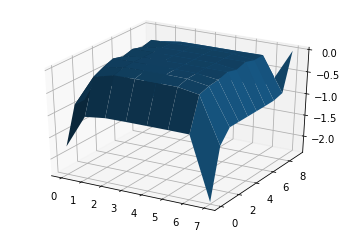

In [7]:
xx=np.arange(0,8,1)
yy=np.arange(0,10,1)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.gca(projection='3d')
my,mx=np.meshgrid(yy,xx)
ax.plot_surface(mx,my,Final_value)